_Aboa Bouadou, Rose Guionnet, Nathan Laîné, Victor Devys, Tino Margely_

In [1]:
#Importation des fonctions : 
from Solve_PLNE import solvePLNEMultiMachines
from utils import *
from graphics import *


In [2]:
# Lecture des donnees du fichier Orano-données-Double.xlsx :
data = pd.read_excel("data/raw/Orano-données-Double.xlsx", sheet_name="Optim", header=5, usecols=[3,4,5,6,7], nrows=47)

In [3]:
# Calculs des performances de chaque machines pour chaque valeur de taux d'uranium : 
predictors=perfs()

In [4]:
# convertion des données et récupération des n premieres commandes : 
n = 10
disp, dmax, duree = dataframe_to_list(data)
disp, dmax, duree = disp[:n], dmax[:n], duree[:n]


In [5]:
# Résolution du PLNE avec des valeurs aléatoires de mu : 
a=[12,-8]
np.random.seed(15)
mu=np.random.uniform(0.02,0.049,15)
[t,price,var]= solvePLNEMultiMachines(disp, dmax, duree,2,10**6,mu,a,predictors)

Temps de résolution =  5.376775503158569
Statut de la solution =  Optimal
Valeur optimale =  147569163.20555028


In [6]:
## Affichage : 

# récupération des variables du plne :
demVal,debVal,livVal,realVal,real2,dem2,deb2,liv2,machine=getValues(var,2, disp)

PLANIFICATION :


<Figure size 432x288 with 0 Axes>

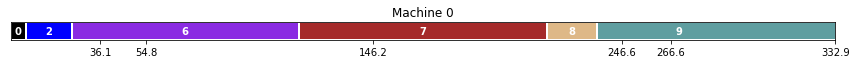

<Figure size 432x288 with 0 Axes>

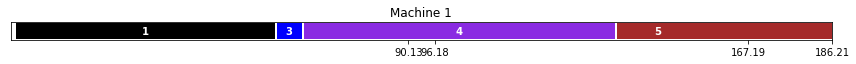

In [7]:
# Graphique représentant les emplois du temps des machines : 
showEDT(machine,deb2,dem2,real2,liv2)

MARGES : 


C:\Users\Tino\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Tino\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


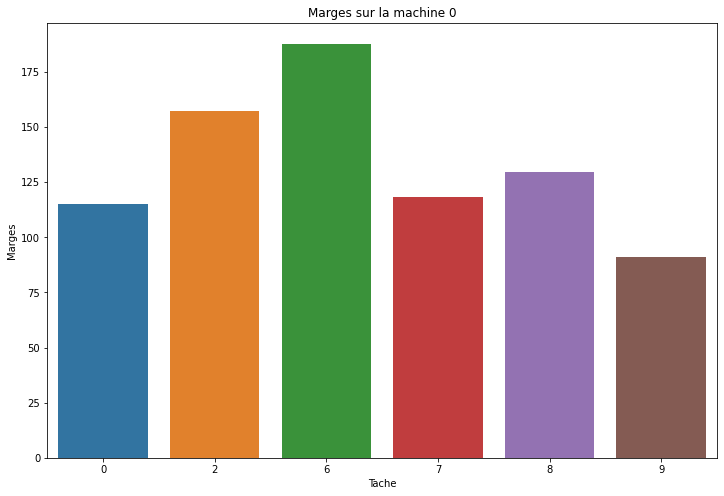

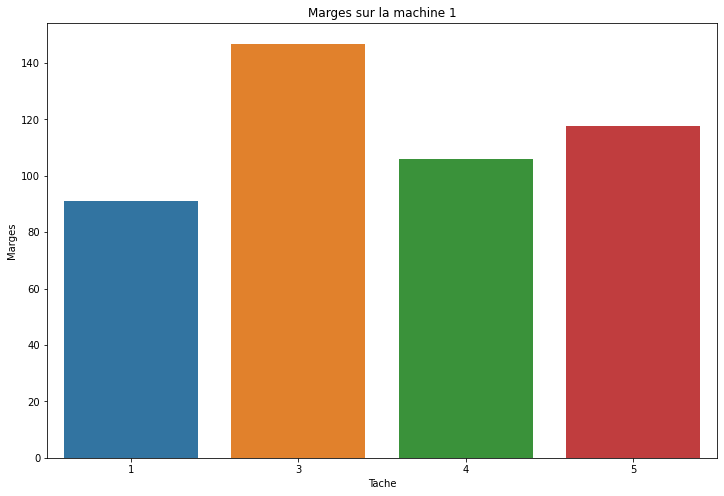

In [8]:
# Histogramme représentant la marge de chaque commande sur la machine où elle est effectuée :
showMarge(machine,livVal,dmax,2)

RENDEMENTS :


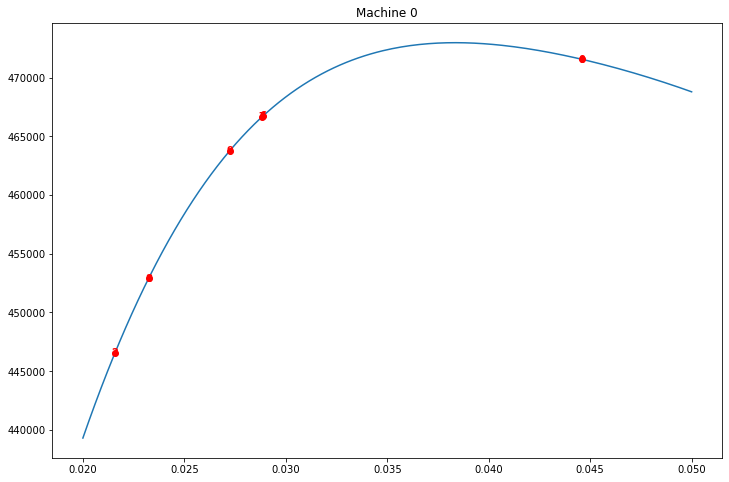

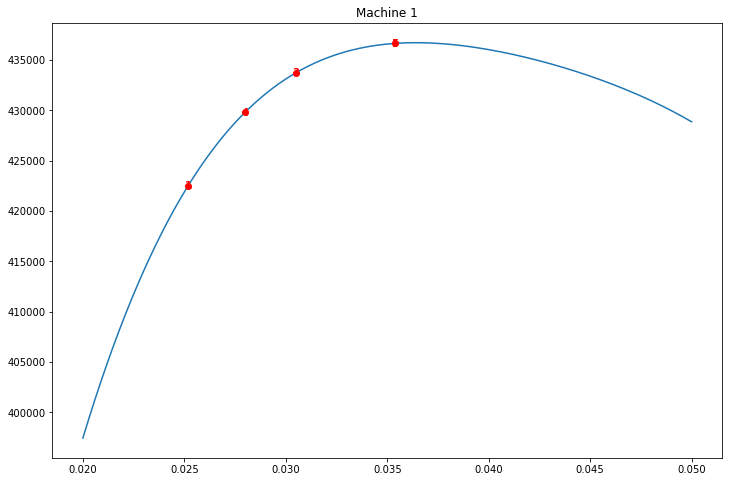

In [9]:
#Graphique représentant le rendement de la machine en fonction de la teneur en uranium désirée.
# Chaque point rouge représente une commande : 
showRendements(machine,mu,predictors)